In [61]:
import numpy as np
from stl import mesh 

your_mesh = mesh.Mesh.from_file('data/D2_8_0.10_par0.stl')

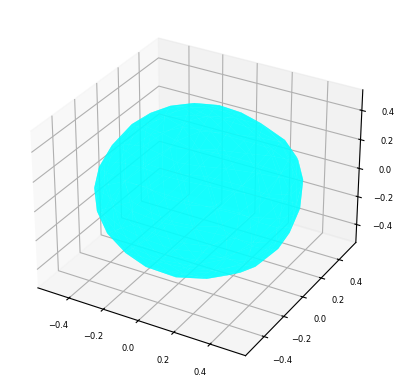

In [62]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Create a new plot with 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Load the STL file
your_mesh = mesh.Mesh.from_file('data/D2_8_0.10_par0.stl')

# Add the vectors to the plot
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
ax.add_collection3d(Poly3DCollection(your_mesh.vectors, alpha=0.7, facecolor='cyan'))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
ax.auto_scale_xyz(scale, scale, scale)

# Show the plot
plt.show()


In [63]:
import numpy as np
from stl import mesh

# Using an existing closed stl file:
your_mesh = mesh.Mesh.from_file('data/D2_8_0.10_par0.stl')

volume, cog, inertia = your_mesh.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))

Volume                                  = 0.5074590047200521
Position of the center of gravity (COG) = [ 0.01291235 -0.01483624  0.00435064]
Inertia matrix at expressed at the COG  = [ 0.04958485 -0.00049499  0.0003546 ]
                                          [-0.00049499  0.04979291  0.00035313]
                                          [0.0003546  0.00035313 0.05007653]


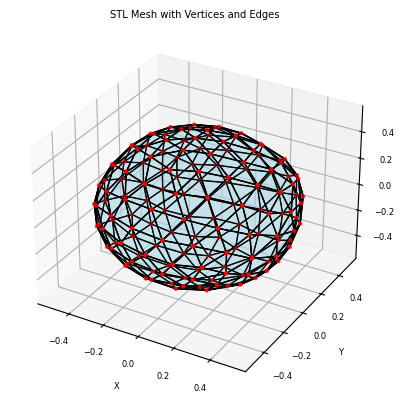

In [65]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

# Load STL file
your_mesh = mesh.Mesh.from_file('data/D2_8_0.10_par0.stl')

all_points = your_mesh.vectors.reshape(-1, 3)
unique_vertices, inverse_indices = np.unique(all_points, axis=0, return_inverse=True)

triangles = inverse_indices.reshape(-1, 3)

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.add_collection3d(Poly3DCollection(your_mesh.vectors, facecolor='lightblue', edgecolor='k', alpha=0.4))

edges = []
for tri in your_mesh.vectors:
    edges.extend([
        [tri[0], tri[1]],
        [tri[1], tri[2]],
        [tri[2], tri[0]],
    ])
ax.add_collection3d(Line3DCollection(edges, colors='black', linewidths=0.5, linestyles='solid'))

# Plot vertices/nodes
ax.scatter(unique_vertices[:, 0], unique_vertices[:, 1], unique_vertices[:, 2], color='red', s=5)

# Autoscale
scale = unique_vertices.flatten()
ax.auto_scale_xyz(scale, scale, scale)

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('STL Mesh with Vertices and Edges')

plt.show()


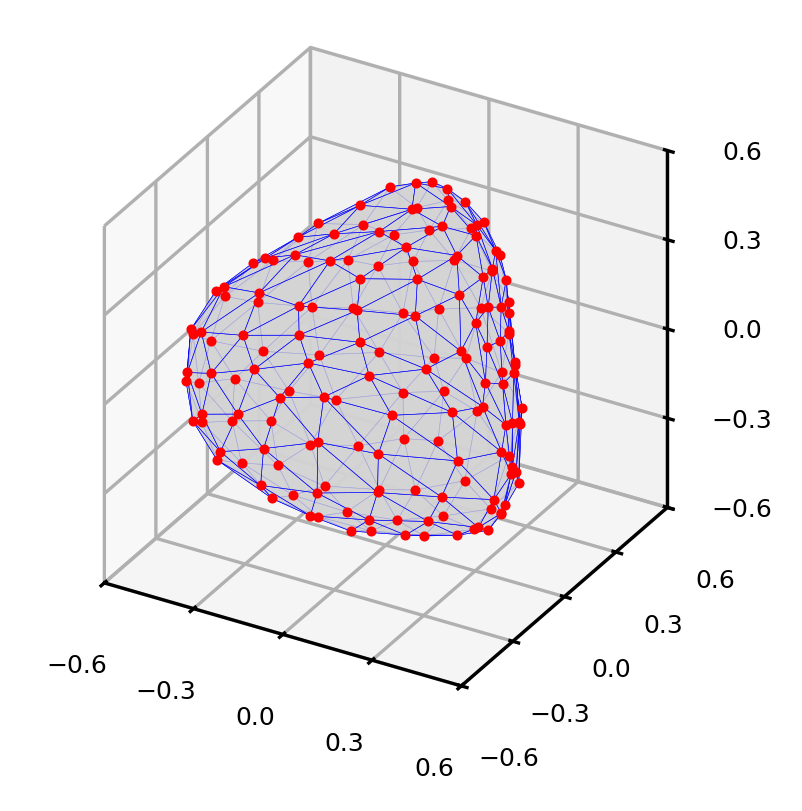

In [66]:
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Create a new plot with 3D axes
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
plt.rc('font', size=6)

# Load the STL file
your_mesh = mesh.Mesh.from_file('data/D2_8_0.30_par0.stl')

# Plot 
poly = Poly3DCollection(your_mesh.vectors, facecolor='lightgrey', edgecolor='b', alpha=0.8, linewidths=0.15)
ax.add_collection3d(poly)

all_points = your_mesh.vectors.reshape(-1, 3)
unique_vertices = np.unique(all_points, axis=0)
ax.scatter(unique_vertices[:, 0], unique_vertices[:, 1], unique_vertices[:, 2],
           color='red', s=2, depthshade=False)

ax.set_xlim([-0.6, 0.6])
ax.set_ylim([-0.6, 0.6])
ax.set_zlim([-0.6, 0.6])
ax.set_xticks(np.arange(-0.6, 0.601, step=0.3))
ax.set_yticks(np.arange(-0.6, 0.601, step=0.3))
ax.set_zticks(np.arange(-0.6, 0.601, step=0.3))

ax.grid(True)
ax.set_box_aspect([1, 1, 1]) 

plt.show()


Number of segments: 47


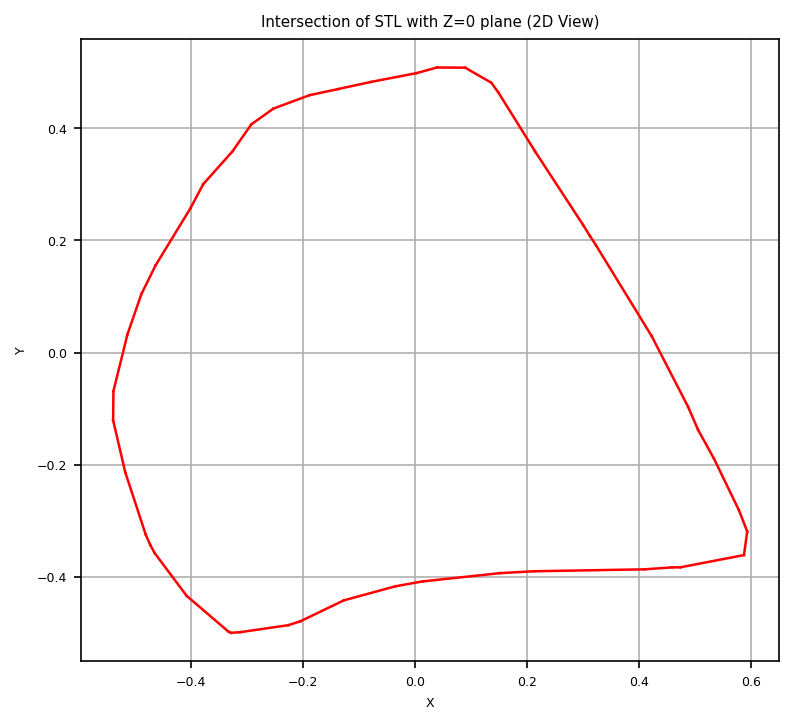

In [67]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d import Axes3D

def intersect_with_z_plane(triangles, z0=0.0):
    """Return line segments resulting from intersecting triangles with Z=z0."""
    segments = []

    for tri in triangles:
        points = []

        for i in range(3):
            p1 = tri[i]
            p2 = tri[(i + 1) % 3]

            z1, z2 = p1[2], p2[2]

            if (z1 - z0) * (z2 - z0) < 0:  # The edge crosses the Z=0 plane
                t = (z0 - z1) / (z2 - z1)
                intersection_point = p1 + t * (p2 - p1)
                points.append(intersection_point)

            elif z1 == z0 and z2 != z0:
                points.append(p1)
            elif z2 == z0 and z1 != z0:
                points.append(p2)

        if len(points) == 2:
            segments.append(points)

    return segments

# Load mesh
your_mesh = mesh.Mesh.from_file('data/D2_8_0.30_par0.stl')

# Get intersection line segments
segments = intersect_with_z_plane(your_mesh.vectors, z0=0.0)

# Extract 2D line segments (xy-plane)
segments_2d = [[(point[0], point[1]) for point in segment] for segment in segments]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)

for segment in segments_2d:
    x_coords, y_coords = zip(*segment)
    ax.plot(x_coords, y_coords, color='red', linewidth=1.2)

# ax.set_xlim([-0.6, 0.6])
# ax.set_ylim([-0.6, 0.6])
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Intersection of STL with Z=0 plane (2D View)")
print("Number of segments:", len(segments_2d))

plt.grid(True)
plt.show()
